In [1]:
# installation paths

# !pip install pandas
# !pip install numpy

In [2]:
# import dependencies
import zipfile
import os.path
import pandas as pd
import numpy as np
from datetime import time
from datetime import datetime as dt
from pandas.api.types import CategoricalDtype

In [3]:
import Group5FileLib as fl

# Unzip files if they are not unzipped on local machine
fl.UnzipFiles()

# Combine Zipped Files
viewFile = fl.CombineFiles()

# Load Lot Fact File
lotFile = fl.LoadLotFacts()

File exists data/VCardTransactions-NoName.csv - NOT un-zipping
File exists data/VCardTransactions-NoName2.csv - NOT un-zipping
File exists data/vtrans.csv - NOT merging


In [4]:
# read files into a data frame
vtrans = pd.read_csv(viewFile)
capacity = pd.read_csv(lotFile)


In [5]:
# read lot facts csv file into pandas dataframe
capacity = capacity.sort_values(by="lot", ascending=True)
capacity = capacity.reset_index(drop=True)
# adjust column name for join later
capacity = capacity.rename(columns= {"lot":"LotNumber"})
capacity

,LotNumber,capacity
0,2,34
1,3,217
2,4,48
3,6,20
4,7,10
5,8,37
6,9,18
7,10,462
8,11,591
9,12,88


In [6]:
# return vtrans dataframe
vtrans[:20]

,tTransID,FullName,CardNumber,LotNumber,EffectiveGroupName,EntranceTime,ExitTime,Sort_Time,BusinessHours,NWHours,UseMoreThan3Hours,HourExceed3Hours,NoEntry,noexit,Consecutive,Overnight
0,22840709,NaN,12777,13,NaN,2022-07-11 12:29:09.493,NaN,2022-07-11 12:29:09.493,NaN,NaN,NaN,NaN,0,1,0,0
1,22840716,NaN,47951,40,NaN,2022-07-11 12:29:09.367,NaN,2022-07-11 12:29:09.367,NaN,NaN,NaN,NaN,0,1,0,0
2,22840719,NaN,58760,3,NaN,2022-07-11 12:29:04.227,NaN,2022-07-11 12:29:04.227,NaN,NaN,NaN,NaN,0,1,0,0
3,22840717,NaN,57369,20,NaN,2022-07-11 12:29:02.680,NaN,2022-07-11 12:29:02.680,NaN,NaN,NaN,NaN,0,1,0,0
4,22840710,NaN,13947,11,NaN,2022-07-11 12:28:53.320,NaN,2022-07-11 12:28:53.320,NaN,NaN,NaN,NaN,0,1,0,0
5,22840715,NaN,27015,10,NaN,2022-07-11 12:28:48.470,NaN,2022-07-11 12:28:48.470,NaN,NaN,NaN,NaN,0,1,0,0
6,22840712,NaN,17052,10,NaN,2022-07-11 12:28:44.627,NaN,2022-07-11 12:28:44.627,NaN,NaN,NaN,NaN,0,1,0,0
7,22840714,NaN,19513,51,NaN,2022-07-11 12:28:38.827,NaN,2022-07-11 12:28:38.827,NaN,NaN,NaN,NaN,0,1,0,0
8,22840721,NaN,59143,9,NaN,2022-07-11 12:28:32.200,NaN,2022-07-11 12:28:32.200,NaN,NaN,NaN,NaN,0,1,0,0
9,22840702,NaN,41050,80,NW (With Permit),2022-07-11 12:27:36.850,NaN,2022-07-11 12:27:36.850,NaN,NaN,NaN,NaN,0,1,0,0


In [7]:
# list columns that we want to look at from vtrans
ini_cols = ['tTransID', 'CardNumber', 'LotNumber', 'EffectiveGroupName','EntranceTime', 'ExitTime', 'NoEntry', 'noexit']

# reset df to updated columns list
vtrans = vtrans.reindex(columns=ini_cols)

# preview
vtrans[:25]

,tTransID,CardNumber,LotNumber,EffectiveGroupName,EntranceTime,ExitTime,NoEntry,noexit
0,22840709,12777,13,NaN,2022-07-11 12:29:09.493,NaN,0,1
1,22840716,47951,40,NaN,2022-07-11 12:29:09.367,NaN,0,1
2,22840719,58760,3,NaN,2022-07-11 12:29:04.227,NaN,0,1
3,22840717,57369,20,NaN,2022-07-11 12:29:02.680,NaN,0,1
4,22840710,13947,11,NaN,2022-07-11 12:28:53.320,NaN,0,1
5,22840715,27015,10,NaN,2022-07-11 12:28:48.470,NaN,0,1
6,22840712,17052,10,NaN,2022-07-11 12:28:44.627,NaN,0,1
7,22840714,19513,51,NaN,2022-07-11 12:28:38.827,NaN,0,1
8,22840721,59143,9,NaN,2022-07-11 12:28:32.200,NaN,0,1
9,22840702,41050,80,NW (With Permit),2022-07-11 12:27:36.850,NaN,0,1


<AxesSubplot:title={'center':'No Entry Records'}, ylabel='None'>

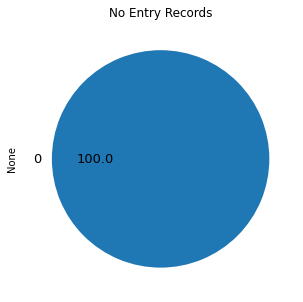

In [8]:
# get value counts for no entry record
no_e = vtrans.value_counts("NoEntry")

# plot as pie chart
no_e.plot(kind="pie", title="No Entry Records", figsize=(5,5), autopct='%.1f', fontsize=13)

<AxesSubplot:title={'center':'No Exit Records'}, ylabel='None'>

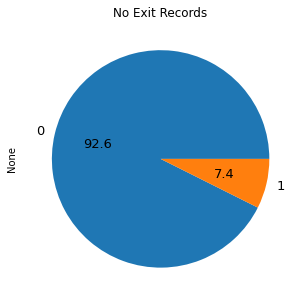

In [9]:
# get value counts for no exit record
no_x = vtrans.value_counts("noexit")

# plot as pie chart
no_x.plot(kind="pie", title="No Exit Records", figsize=(5,5), autopct='%.1f', fontsize=13)

In [10]:
# change the format for date and time to drop nanosecs for both entry and exit date/time
vtrans['EntranceTime'] = pd.to_datetime(vtrans['EntranceTime']).dt.strftime('%Y-%m-%d %H:%M:%S')
vtrans['EntranceTime'] = pd.to_datetime(vtrans['EntranceTime'], format='%Y-%m-%d %H:%M:%S')

vtrans['ExitTime'] = pd.to_datetime(vtrans['ExitTime']).dt.strftime('%Y-%m-%d %H:%M:%S')
vtrans['ExitTime'] = pd.to_datetime(vtrans['ExitTime'], format='%Y-%m-%d %H:%M:%S')


In [11]:
# breakout vtrans date/time into individual columns for entry and exit - 
vtrans['EntranceDate'] = vtrans['EntranceTime'].dt.date
vtrans['TimeIn'] = vtrans['EntranceTime'].dt.time
vtrans['ExitDate'] = vtrans['ExitTime'].dt.date
vtrans['TimeOut'] = vtrans['ExitTime'].dt.time

# breakout vtrans day of week into individual columns for entry and ex
vtrans['EntranceDay'] = vtrans['EntranceTime'].dt.day_name()
vtrans['ExitDay'] = vtrans['ExitTime'].dt.day_name()

# subtract exitout and timein to get time parked
vtrans['TimeParked'] = vtrans['ExitTime'] - vtrans['EntranceTime']

# get the time in seconds, then divide by 3600 to get hours
vtrans['TimeParked'] = vtrans['TimeParked'].dt.seconds / 3600

In [12]:
# getting counts for days of week to verify to_day code worked as expected. 
e_count = vtrans.value_counts("EntranceDay")
x_count = vtrans.value_counts("ExitDay")

# show value counts
e_count
# x_count

EntranceDay
Wednesday    1188984
Tuesday      1188198
Thursday     1159389
Monday       1082119
Friday       1061582
Saturday      533065
Sunday        529685
dtype: int64

In [13]:
# Using mutliple select boxes to filter a single dataframe with columns also filtered
col_titles = ['tTransID', 'CardNumber', 'LotNumber', 'EffectiveGroupName','EntranceDate', 'EntranceDay', 'TimeIn',
       'ExitDate','ExitDay', 'TimeOut', 'TimeParked']

vtrans = vtrans.reindex(columns=col_titles)

vtrans[:30]

,tTransID,CardNumber,LotNumber,EffectiveGroupName,EntranceDate,EntranceDay,TimeIn,ExitDate,ExitDay,TimeOut,TimeParked
0,22840709,12777,13,NaN,2022-07-11,Monday,12:29:09,NaT,NaN,NaT,NaN
1,22840716,47951,40,NaN,2022-07-11,Monday,12:29:09,NaT,NaN,NaT,NaN
2,22840719,58760,3,NaN,2022-07-11,Monday,12:29:04,NaT,NaN,NaT,NaN
3,22840717,57369,20,NaN,2022-07-11,Monday,12:29:02,NaT,NaN,NaT,NaN
4,22840710,13947,11,NaN,2022-07-11,Monday,12:28:53,NaT,NaN,NaT,NaN
5,22840715,27015,10,NaN,2022-07-11,Monday,12:28:48,NaT,NaN,NaT,NaN
6,22840712,17052,10,NaN,2022-07-11,Monday,12:28:44,NaT,NaN,NaT,NaN
7,22840714,19513,51,NaN,2022-07-11,Monday,12:28:38,NaT,NaN,NaT,NaN
8,22840721,59143,9,NaN,2022-07-11,Monday,12:28:32,NaT,NaN,NaT,NaN
9,22840702,41050,80,NW (With Permit),2022-07-11,Monday,12:27:36,NaT,NaN,NaT,NaN


In [14]:
# Defining a widget to select a certain lot#

from ipywidgets import widgets, interactive, Layout
w_lot = widgets.Dropdown(
    options = ["All"] + sorted(set(vtrans.LotNumber)),     
    value = "All",
    description = 'Lot #:',
    disabled = False
)

def view(lot):
    if lot == "All":
        dftmp = vtrans
    else:
        dftmp = vtrans[vtrans.LotNumber == lot]
    
    display(dftmp)

i = interactive(view, lot=w_lot)
display(i)

interactive(children=(Dropdown(description='Lot #:', options=('All', 0, 3, 4, 6, 8, 9, 10, 11, 13, 14, 18, 20,…

In [15]:
# Defining a widget to select data for a certain day of the week
w_dow = widgets.Dropdown(
    options = ["All", "Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"],     
    value = "Monday",
    description = 'Day of the week:',
    style = {"description_width": '100px'},
    disabled = False
)

def view(dow):
    if dow == "All":
        dftmp = vtrans
    else:
        dftmp = vtrans[vtrans.EntranceDay == dow]
    
    display(dftmp)

i = interactive(view, dow=w_dow)
display(i)

interactive(children=(Dropdown(description='Day of the week:', index=1, options=('All', 'Monday', 'Tuesday', '…

In [16]:
# Defining a widget to select data for a certain day of the week and lot

w_lot_combo = widgets.Dropdown(
    options = ["All"] + sorted(set(vtrans.LotNumber)),
    continuous_update=False,
    value = "All",
    description = 'Lot#:',
    style = {"description_width": '100px'},
    disabled = False
)

w_dow_combo = widgets.Dropdown(
    options = ["All", "Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"],   
    continuous_update=False,
    value = "Monday",
    description = 'Day of the week:',
    style = {"description_width": '100px'},
    disabled = False
)

    
def change_a(l,d):
    if w_lot_combo.value == "All":
        dftmp = vtrans
    else:
        dftmp = vtrans[vtrans.LotNumber == w_lot_combo.value]
        
    if w_dow_combo.value != "All":
        dftmp = dftmp[dftmp.EntranceDay == w_dow_combo.value]
    display(dftmp)
    

i = interactive(change_a, l = w_lot_combo, d = w_dow_combo)
display(i)

interactive(children=(Dropdown(description='Lot#:', options=('All', 0, 3, 4, 6, 8, 9, 10, 11, 13, 14, 18, 20, …

In [17]:
# Bringing the lot capacity into the vtrans data frame as df = lottime
lottime = vtrans
lottime


,tTransID,CardNumber,LotNumber,EffectiveGroupName,EntranceDate,EntranceDay,TimeIn,ExitDate,ExitDay,TimeOut,TimeParked
0,22840709,12777,13,NaN,2022-07-11,Monday,12:29:09,NaT,NaN,NaT,NaN
1,22840716,47951,40,NaN,2022-07-11,Monday,12:29:09,NaT,NaN,NaT,NaN
2,22840719,58760,3,NaN,2022-07-11,Monday,12:29:04,NaT,NaN,NaT,NaN
3,22840717,57369,20,NaN,2022-07-11,Monday,12:29:02,NaT,NaN,NaT,NaN
4,22840710,13947,11,NaN,2022-07-11,Monday,12:28:53,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6743017,9008592,22348,70,NW (With Permit),2018-01-01,Monday,02:47:54,2018-01-01,Monday,15:09:22,12.357778
6743018,9007839,40907,70,NW ONLY,2018-01-01,Monday,01:53:11,2018-01-01,Monday,02:43:54,0.845278
6743019,9007851,2005,10,Lot 10,2018-01-01,Monday,01:33:14,2018-01-01,Monday,05:03:29,3.504167
6743020,9056422,23050,70,NW (With Permit),2018-01-01,Monday,01:14:17,NaT,NaN,NaT,NaN


In [18]:
# name columns that want to group by
lotcols = ['LotNumber','EntranceDate', 'EntranceDay']

# set new dataframe lottime1 to the lotcols list
lottime1 = lottime.reindex(columns=lotcols)

# drop na columns to omit missing data
lottime1.dropna()

#group by daily counts at each lot
lottime1['daily_count'] = lottime1.groupby(['LotNumber', 'EntranceDate', 'EntranceDay']).LotNumber.transform('count')

# drop duplicates as way to reset index
lottime1 = lottime1.drop_duplicates()

# join capacity column back into df
lottime1 = pd.merge(lottime1, capacity, on ="LotNumber")

# get percentage of fill for the lot
lottime1['perc_full'] = lottime1['daily_count']/lottime1['capacity']

# average time parked per lot per day
lottime1['Avg_TimeParked'] = lottime.groupby(['EntranceDate','LotNumber','EntranceDay'])['TimeParked'].transform('mean')

# reorder columns for more suitable look
lt1_cols = ['EntranceDate','LotNumber', 'EntranceDay','capacity','daily_count', 'perc_full', 'Avg_TimeParked']

lottime1 = lottime1.reindex(columns=lt1_cols)

# order by entrance date and lot number to clean look in dataframe and widget
lottime1 = lottime1.sort_values(by=['EntranceDate','LotNumber'])

lottime1 = lottime1.reset_index(drop=True)

# return data frame
lottime1[:20]

,EntranceDate,LotNumber,EntranceDay,capacity,daily_count,perc_full,Avg_TimeParked
0,2018-01-01,3,Monday,217,1,0.004608,9.716302
1,2018-01-01,6,Monday,20,13,0.650000,2.652946
2,2018-01-01,10,Monday,462,52,0.112554,8.983953
3,2018-01-01,11,Monday,591,139,0.235195,7.966172
4,2018-01-01,14,Monday,130,1,0.007692,4.677940
5,2018-01-01,30,Monday,156,64,0.410256,4.866312
6,2018-01-01,50,Monday,25,49,1.960000,11.013599
7,2018-01-01,51,Monday,58,6,0.103448,8.861599
8,2018-01-01,70,Monday,8,348,43.500000,5.400499
9,2018-01-02,3,Tuesday,217,133,0.612903,9.832449


In [19]:
# average time parked - working on adding this in. 
lotcols = ['LotNumber','EntranceDate','EntranceDay', 'capacity', 'daily_count', 'perc_full', 'Avg_TimeParked',]

lottime2 = lottime1.reindex(columns=lotcols)

# get mean values of time parked, daily user counts, and percent full - round to two decimals
lottime2['dow_atp'] = lottime1.groupby(['LotNumber','EntranceDay'])['Avg_TimeParked'].transform('mean').round(2)

lottime2['dow_adc'] = lottime1.groupby(['LotNumber','EntranceDay'])['daily_count'].transform('mean').round(2)

lottime2['dow_apf'] = lottime1.groupby(['LotNumber','EntranceDay'])['perc_full'].transform('mean').round(2)

# drop unneeded columns
lottime2 = lottime2.drop(columns = ['EntranceDate','Avg_TimeParked','daily_count','perc_full'])
                                       
lottime2 = lottime2.drop_duplicates()

lottime2 = lottime2.reset_index(drop=True)

# give day of week a category to order data frame by lot number and day of week
dow = ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]

dow_type = CategoricalDtype(categories=dow, ordered=True)

lottime2['EntranceDay'] = lottime2['EntranceDay'].astype(dow_type)
# final sort of data frame
lottime2 = lottime2.sort_values(['LotNumber', 'EntranceDay'])

# view 2 weeks of data to make sure order and type codes worked
lottime2[:14]

,LotNumber,EntranceDay,capacity,dow_atp,dow_adc,dow_apf
0,3,Monday,217,8.11,317.63,1.46
9,3,Tuesday,217,8.31,341.51,1.57
30,3,Wednesday,217,8.28,337.41,1.55
51,3,Thursday,217,7.95,331.20,1.53
72,3,Friday,217,8.29,249.90,1.15
92,3,Saturday,217,8.10,55.64,0.26
107,3,Sunday,217,8.30,82.61,0.38
124,4,Monday,48,6.52,45.89,0.96
10,4,Tuesday,48,6.41,48.68,1.01
31,4,Wednesday,48,6.59,49.01,1.02


In [20]:
# Defining a widget to select data for a certain day of the week and lot

w_lot_combo = widgets.Dropdown(
    options = ["All"] + sorted(set(lottime1.LotNumber)),
    continuous_update=False,
    value = "All",
    description = 'Lot#:',
    style = {"description_width": '100px'},
    disabled = False
)

w_dow_combo = widgets.Dropdown(
    options = ["All", "Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"],   
    continuous_update=False,
    value = "Monday",
    description = 'Day of the week:',
    style = {"description_width": '100px'},
    disabled = False
)

    
def change_a(l,d):
    if w_lot_combo.value == "All":
        dftmp = lottime2
    else:
        dftmp = lottime2[lottime2.LotNumber == w_lot_combo.value]
        
    if w_dow_combo.value != "All":
        dftmp = dftmp[dftmp.EntranceDay == w_dow_combo.value]
    display(dftmp)
    
    

i = interactive(change_a, l = w_lot_combo, d = w_dow_combo)
display(i)

interactive(children=(Dropdown(description='Lot#:', options=('All', 3, 4, 6, 8, 9, 10, 11, 13, 14, 18, 20, 21,…